# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | bamyan
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | swan hill
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | chernyshevskiy
Processing Record 15 of Set 1 | kattivakkam
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | kourou
Processing Record 18 of Set 1 | dili
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | yellowknife
Proce

Processing Record 42 of Set 4 | argo
Processing Record 43 of Set 4 | greater sudbury
Processing Record 44 of Set 4 | la ferte-bernard
Processing Record 45 of Set 4 | trairi
Processing Record 46 of Set 4 | terekli-mekteb
Processing Record 47 of Set 4 | polyarnyye zori
Processing Record 48 of Set 4 | pueblo
Processing Record 49 of Set 4 | nova sintra
Processing Record 0 of Set 5 | port saint john's
Processing Record 1 of Set 5 | griffith
Processing Record 2 of Set 5 | crane
Processing Record 3 of Set 5 | acapulco de juarez
Processing Record 4 of Set 5 | college
Processing Record 5 of Set 5 | illapel
Processing Record 6 of Set 5 | necochea
Processing Record 7 of Set 5 | juan griego
Processing Record 8 of Set 5 | mae sot
Processing Record 9 of Set 5 | ulaangom
Processing Record 10 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 5 | susuman
Processing Record 12 of Set 5 | ljusdal
Processing Record 13 of Set 5 | lekki
City not found. Skipping...
Processing Record 1

Processing Record 29 of Set 8 | mastung
Processing Record 30 of Set 8 | dire dawa
Processing Record 31 of Set 8 | caconda
Processing Record 32 of Set 8 | marsh harbour
Processing Record 33 of Set 8 | dryden
Processing Record 34 of Set 8 | kletskaya
Processing Record 35 of Set 8 | sao felix do xingu
Processing Record 36 of Set 8 | cam ranh
Processing Record 37 of Set 8 | palembang
Processing Record 38 of Set 8 | montego bay
Processing Record 39 of Set 8 | cabedelo
Processing Record 40 of Set 8 | kasulu
Processing Record 41 of Set 8 | diapaga
Processing Record 42 of Set 8 | mandan
Processing Record 43 of Set 8 | rundu
Processing Record 44 of Set 8 | qui nhon
Processing Record 45 of Set 8 | tyuratam
Processing Record 46 of Set 8 | lagoa
Processing Record 47 of Set 8 | beyneu
Processing Record 48 of Set 8 | pangody
Processing Record 49 of Set 8 | dowagiac
Processing Record 0 of Set 9 | greymouth
Processing Record 1 of Set 9 | karymskoye
Processing Record 2 of Set 9 | prince rupert
Processi

Processing Record 19 of Set 12 | cervantes
Processing Record 20 of Set 12 | saint-francois
Processing Record 21 of Set 12 | kuala tungkal
Processing Record 22 of Set 12 | port blair
Processing Record 23 of Set 12 | goure
Processing Record 24 of Set 12 | port-vila
Processing Record 25 of Set 12 | vilyuchinsk
Processing Record 26 of Set 12 | tolanaro
Processing Record 27 of Set 12 | hodmezovasarhely
Processing Record 28 of Set 12 | amungan
Processing Record 29 of Set 12 | nanchong
Processing Record 30 of Set 12 | phrai bueng
Processing Record 31 of Set 12 | chicoana
Processing Record 32 of Set 12 | chingola
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,14.15,83,8,9.89,SH,1699838360
1,whitehorse,60.7161,-135.0538,-2.57,80,100,3.60,CA,1699838360
2,iqaluit,63.7506,-68.5145,-17.95,77,20,2.57,CA,1699838281
3,bamyan,34.7500,67.2500,-2.68,50,0,0.50,AF,1699838360
4,grytviken,-54.2811,-36.5092,3.02,90,100,1.87,GS,1699838360


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.15,83,8,9.89,SH,1699838360
1,whitehorse,60.7161,-135.0538,-2.57,80,100,3.60,CA,1699838360
2,iqaluit,63.7506,-68.5145,-17.95,77,20,2.57,CA,1699838281
3,bamyan,34.7500,67.2500,-2.68,50,0,0.50,AF,1699838360
4,grytviken,-54.2811,-36.5092,3.02,90,100,1.87,GS,1699838360


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

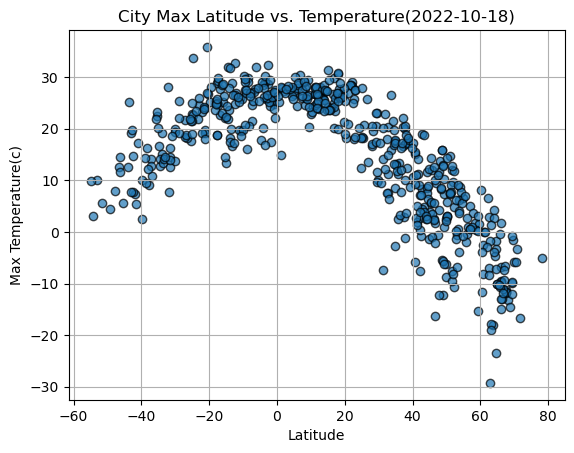

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.ylabel("Max Temperature(c)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

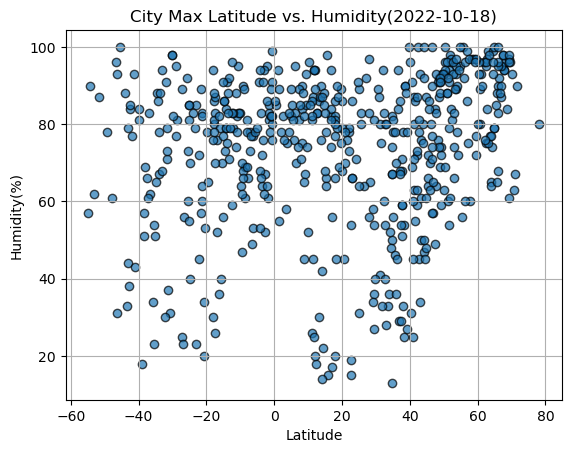

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity(2022-10-18)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

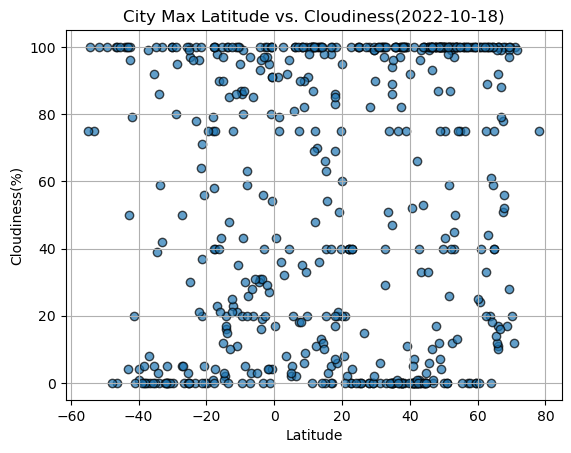

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness(2022-10-18)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

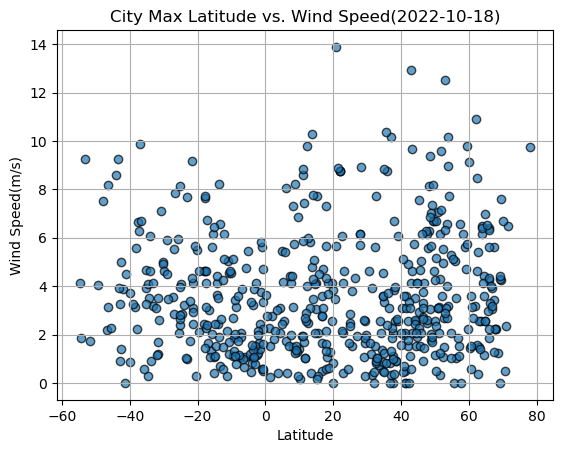

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed(2022-10-18)")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, (0, 0)):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color="red", ha='left')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    print(f"The r-value is: {rvalue}")
    
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,-2.57,80,100,3.60,CA,1699838360
2,iqaluit,63.7506,-68.5145,-17.95,77,20,2.57,CA,1699838281
3,bamyan,34.7500,67.2500,-2.68,50,0,0.50,AF,1699838360
7,jamestown,42.0970,-79.2353,2.80,72,0,2.57,US,1699838262
9,tazovsky,67.4667,78.7000,-11.21,95,51,5.61,RU,1699838348


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.15,83,8,9.89,SH,1699838360
4,grytviken,-54.2811,-36.5092,3.02,90,100,1.87,GS,1699838360
5,punta arenas,-53.1500,-70.9167,10.06,62,75,9.26,CL,1699838360
6,adamstown,-25.0660,-130.1015,22.80,85,100,8.14,PN,1699838361
8,puerto natales,-51.7236,-72.4875,5.52,87,100,1.74,CL,1699838361


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8829376024095357


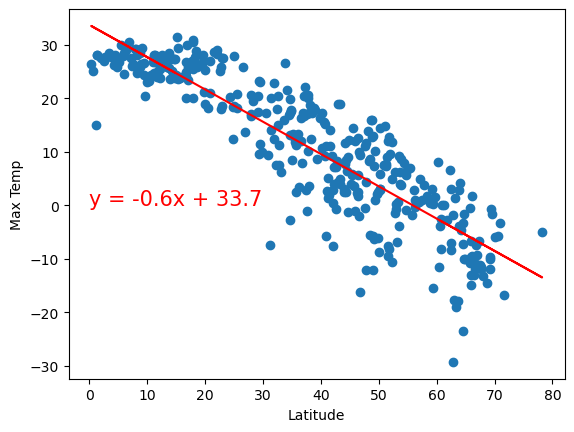

In [76]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp",
    (0, 0)
    )


The r-value is: 0.729776155295521


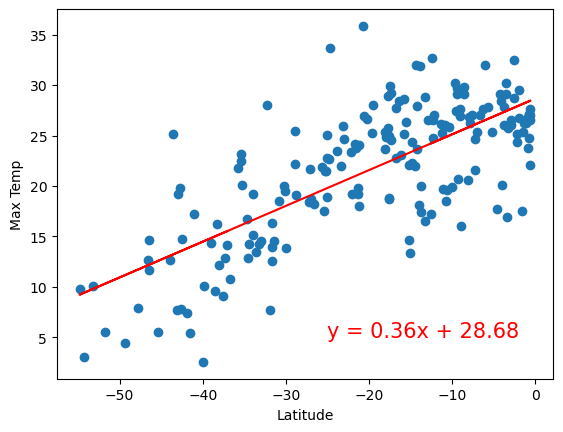

In [81]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp",
    (-25, 5)
    )

**Discussion about the linear relationship: Both of these scatter graph help to prove that the closer a location is to the equator, the warmer that location will be. The closer the lattitude is to 0, the wamer the temperature will be. With the help of the regression line this trend is seen easier. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.26091299219494957


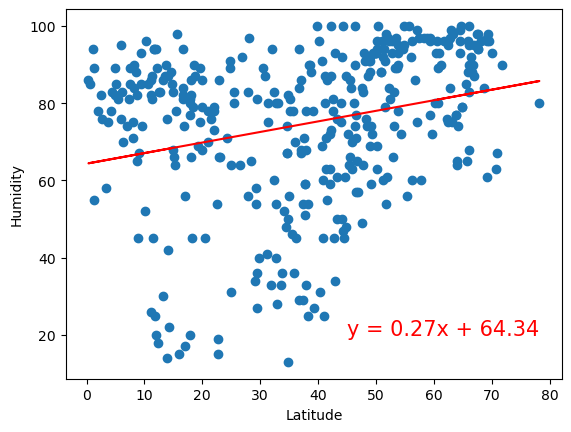

In [85]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity",
    (45,20)
    )

The r-value is: 0.17948682061915835


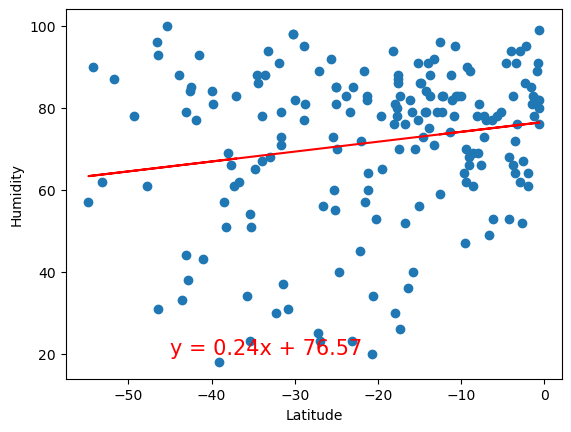

In [86]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity",
    (-45,20)
    )

**Discussion about the linear relationship: For both Northern and Southern Hemisphere the r-value is close to zero, this mean there is not a strong linear relationship between Latitude and humidity. Points are scattered and show no true pattern between the two for either hemisphere. Outside factors such as atmoshpere climate may play a part in the variability.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10172149318899047


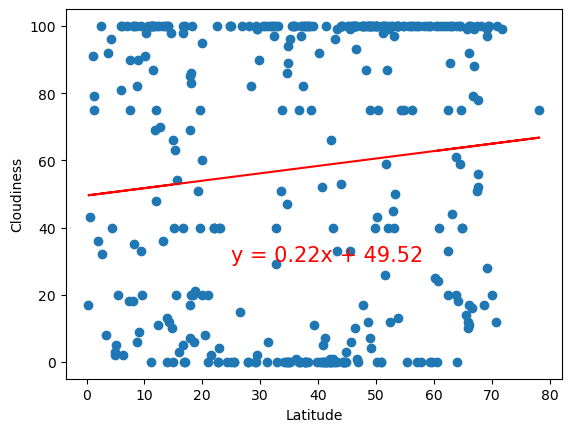

In [89]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness",
    (25,30)
    )

The r-value is: 0.026787083756725606


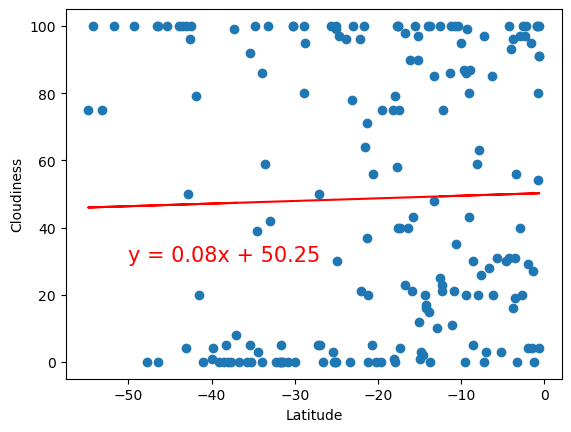

In [91]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness",
    (-50,30)
    )

**Discussion about the linear relationship:** For both Northern and Southern Hemisphere the r-value is close to zero, this mean there is not a strong linear relationship between Latitude and cloudiness. Points are scattered and show no true pattern between the two for either hemisphere. Outside factors such as atmoshpere climate may play a part in the variability.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09957999638970808


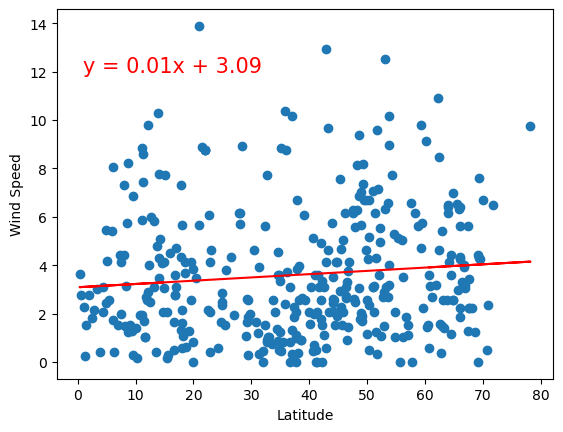

In [92]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed",
    (1,12)
    )

The r-value is: -0.304810802098274


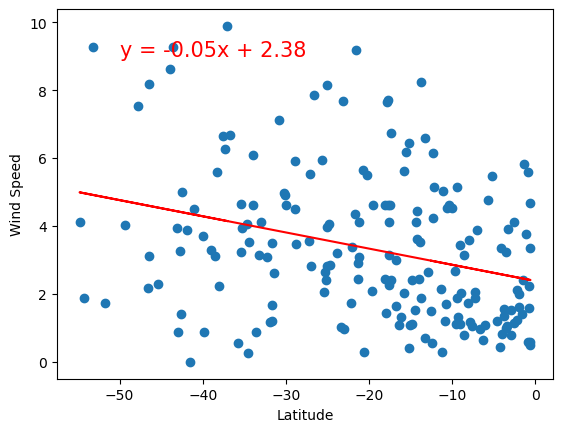

In [94]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed",
    (-50,9)
    )

**Discussion about the linear relationship:** For both Northern and Southern Hemisphere the r-value is close to zero, this mean there is not a strong linear relationship between Latitude and Wind Speed. Points are scatterd and show no true pattern between the two for either hemisphere. Outside factors such as atmoshpere climate may play a part in the variability.